# KMeans

### Clusterização

Algoritmos de *clustering* são um tipo de aprendizado não-supervisionado que permite identificar padrões na distribuição do banco de dados, sem uma variável target pré-definida. Para isso, separam-se as observações similares em diferentes grupos (clusters). 

Tipos de algoritmos de clustering:

* Centróides: Cada cluster é representado por um ponto que é a média das observações que estão dentro dele (K-Means)
* Conectividade: Clusters são baseados na distância das conexões entre as observações (Hierarchichal Clustering) 
* Distribuições: utilizam distribuições de probabilidade (Gaussian Mixture)
* Densidade: Clusters definidos como áreas densas, definidas pela distância entre as observações mais próximas (DBSCAN)

**Obs.:** Em modelos de aprendizado não-supervisionado, não há necessidade de dividir o conjunto de dados em treinamento e teste, pois não há uma maneira objetiva de avaliar a qualidade do modelo.

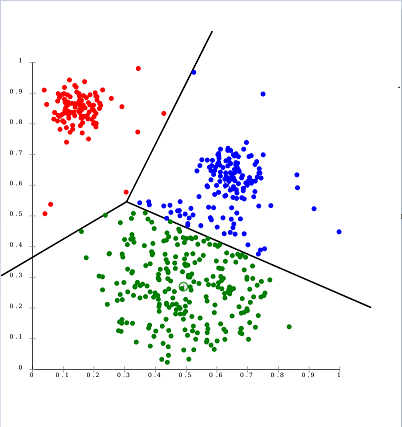

### Modelo K-Means

K-Means é um algoritmo de clusterização baseado em centróides, ou seja, pontos que representam a essência de um cluster. Cada observação do conjunto de dados é vista como um ponto situado em um espaço n-dimensional cujas coordenadas são as variáveis analisadas (e n é o número de variáveis). O ajuste do K-Means implica otimizar a posição dos centróides nesse espaço, realizando algumas etapas pré-definidas de forma iterativa.

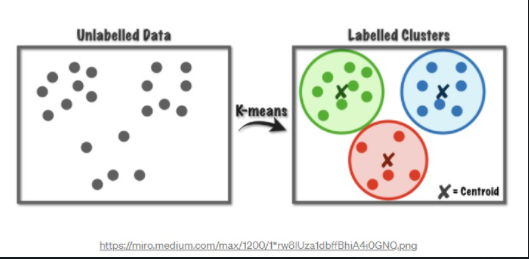

* Inicialização: Fornecemos uma quantidade `k` desejada de clusters que irão dividir o banco de dados e escolhemos `k` pontos aleatórios como posições iniciais dos clusters.

* Clusterização: Calculamos a distância euclidiana entre as observações e cada cluster, e adicionamos cada observação ao cluster que apresenta o centróide mais próximo.

* Recálculo dos Centróides: Os novos centróides que representam cada cluster são recalculados como sendo a média das observações que foram designadas a esse cluster. 

A partir daí, as etapas de clusterização e recálculo dos centróides são realizadas de forma iterativa até se chegar em um ponto otimo ou limite de iterações.

Representação do cálculo da distância euclidiana entre dois pontos (x = 1, y = 0) e (x = 0, y = 2).

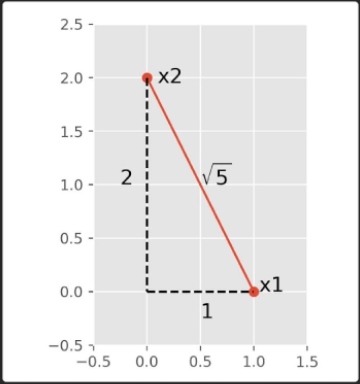

Prós:
* Fácil implementação
* Escalabilidade em grandes bases de dados

Contras: 
* Dificuldade em prever o número exato de clusters necessários para definir bem o conjunto de dados.
* Baixa capacidade preditiva quando os clusters ótimos possuem tamanho e densidade diferentes.

### Padronização

Ao estimar um algoritmo de K-Means, é importante utilizar variáveis que estão em escalas semelhantes. Uma forma de fazer isso é padronizar todas as variáveis, encontrando a sua distância (em quantidade de desvios-padrão) em relação à média. Para isso, podemos utilizar o objeto `StandardScaler`.

# Construindo o Algoritmo

### Importação das Bibliotecas e Manipulação dos Dados

In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc

# Manipular dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv("../dados/winequality-red.csv", sep = ";")
X = df[['alcohol', 'fixed acidity']] 

scale = StandardScaler()
scale.fit(X)
X = scale.transform(X)
X

array([[-0.96024611, -0.52835961],
       [-0.58477711, -0.29854743],
       [-0.58477711, -0.29854743],
       ...,
       [ 0.54162988, -1.1603431 ],
       [-0.20930812, -1.39015528],
       [ 0.54162988, -1.33270223]])

### Ajuste do Modelo

In [32]:
modelo = KMeans(n_clusters = 3)
modelo.fit(X)
y_pred = modelo.predict(X)

In [17]:
# Retorna os centróides de cada cluster
modelo.cluster_centers_

array([[ 1.20029404, -0.54844158],
       [-0.66614036, -0.36390294],
       [ 0.05291178,  1.47387899]])

In [24]:
# Retorna a inércia do modelo
modelo.inertia_

1197.663954173037

### Plot dos Clusters

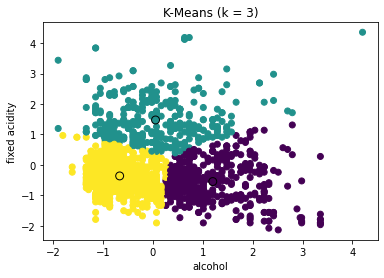

In [39]:
plt.scatter(X[:,0], # x = Coluna 0 (alcohol)
            X[:,1], # y = Coluna 1 (fixed acidity)
            c = y_pred) # Cor = cluster associado

plt.scatter(modelo.cluster_centers_[:, 0], # Eixo X dos centroides 
            modelo.cluster_centers_[:, 1], # Eixo Y dos centroides 
            marker = ".",
            s = 250,
            c = [0,1,2],
            edgecolors='k')
plt.xlabel('alcohol'); plt.ylabel('fixed acidity')
plt.title('K-Means (k = 3)')
plt.show()

### Otimização

O único hiperparâmetro a ser otimizado é o valor de K, que seria o número ótimo de clusters que caracterizam um conjunto de dados. 

**Inércia** é uma medida da qualidade do ajuste de do modelo a um banco de dados, sendo calculada como a soma do quadrado das distâncias entre cada observação e seu respectivo centróide.

Para encontrar o ponto ótimo, podemos estimar o KMeans iterativamente a partir de diversos valores de K, e obter a **inércia** de cada um. A tendência é de que ela se reduza quanto maior o valor de K, até um ponto em que seja zero (K = n, logo cada observação possui seu próprio cluster).
* Valores muito pequenos para a inércia não são desejáveis tendo em vista que o modelo perde sua capacidade de generalização, basicamente caindo em overfitting.
* Inércias muito altas representam uma generalização exacerbada do modelo, com clusters que explicam muito pouco o comportamento das variáveis.

O número de clusters que maximiza a relação "alta inércia x overfitting" é o ponto de inflexão do *Gráfico de Cotovelo*, que plota a inércia (eixo y) para cada valor de K (eixo x). Nesse ponto, a inércia para de cair tão rapidamente, e obtemos uma inclinação mais próxima de uma reta `y = 1 - x`.

In [25]:
inercias = []
for i in np.arange(1, 11):
    modelo_teste = KMeans(n_clusters = i)
    modelo_teste.fit(X)
    inercias.append(modelo_teste.inertia_)

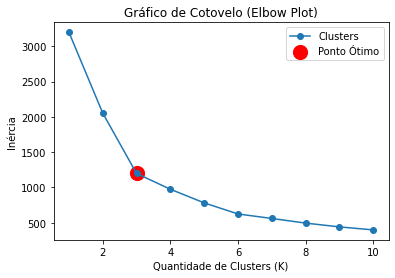

In [45]:
# Gráfico de Cotovelo
plt.plot(np.arange(1, 11), inercias, marker = 'o', label = 'Clusters')
plt.xlabel('Quantidade de Clusters (K)')
plt.ylabel('Inércia')
plt.title('Gráfico de Cotovelo (Elbow Plot)')

# Ponto Ótimo
plt.scatter(3, modelo.inertia_, marker = "o", s = 200, color = 'red', label = 'Ponto Ótimo')
plt.legend()
plt.show()